<a href="https://colab.research.google.com/github/JorgeFCRodrigues/Machine-Learning/blob/main/Reconhecimento_Facial_do_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00


In [4]:
import numpy as np
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout, BatchNormalization
import matplotlib.pyplot as plt
from keras_preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
import os

# Create a directory for the dataset
dataset_dir = "./face_recognition_dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Download and unzip the dataset into the created directory
!wget https://www.kaggle.com/api/v1/datasets/download/vasukipatel/face-recognition-dataset -O {dataset_dir}/face-recognition-dataset.zip
!unzip {dataset_dir}/face-recognition-dataset.zip -d {dataset_dir}

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_76.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_77.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_78.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_79.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_8.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_80.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_81.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_82.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_83.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_84.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra Daddario_85.jpg  
  inflating: ./face_recognition_dataset/Faces/Faces/Alexandra 

In [6]:
train_dir= dataset_dir
generator = ImageDataGenerator()
train_ds = generator.flow_from_directory(train_dir,target_size=(224, 224),batch_size=32)
classes = list(train_ds.class_indices.keys())

Found 5124 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(96, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(len(classes),activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 26, 26, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 96)     │        55,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12, 12, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 32)     │        27,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 5, 5, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       102,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243,330 (950.51 KB)

 Trainable params: 242,754 (948.26 KB)

 Non-trainable params: 576 (2.25 KB)

In [9]:
history = model.fit(train_ds,epochs= 10, batch_size=32)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 61s 305ms/step - accuracy: 0.9490 - loss: 0.1102
Epoch 2/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 249ms/step - accuracy: 0.9951 - loss: 0.0166
Epoch 3/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9953 - loss: 0.0113
Epoch 4/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 39s 242ms/step - accuracy: 0.9971 - loss: 0.0057
Epoch 5/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 42s 247ms/step - accuracy: 0.9975 - loss: 0.0063
Epoch 6/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 250ms/step - accuracy: 0.9975 - loss: 0.0067
Epoch 7/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 252ms/step - accuracy: 0.9950 - loss: 0.0119
Epoch 8/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 247ms/step - accuracy: 0.9966 - loss: 0.0093
Epoch 9/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - accuracy: 0.9970 - loss: 0.0072
Epoch 10/10
161/161 ━━━━━━━━━━━━━━━━━━━━ 40s 248ms/step - accuracy: 0.9988 - loss: 0.0021


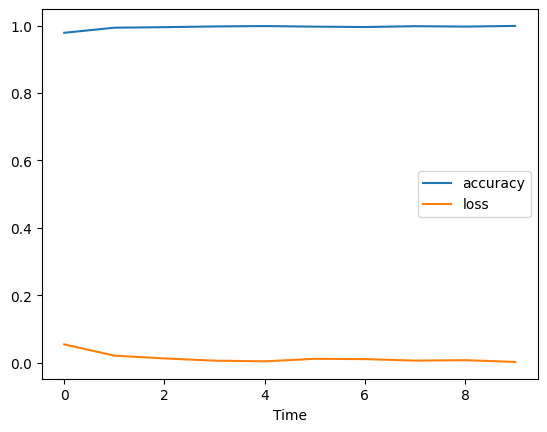

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.xlabel('Time')
plt.legend(['accuracy', 'loss'])
plt.show()

In [11]:
def predict_image(image_path):
    img = image.load_img(image_path, target_size=(224,224,3))
    plt.imshow(img)
    plt.show()
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=32)
    print("Actual: "+(image_path.split("/")[-1]).split("_")[0])
    print("Predicted: "+classes[np.argmax(pred)])

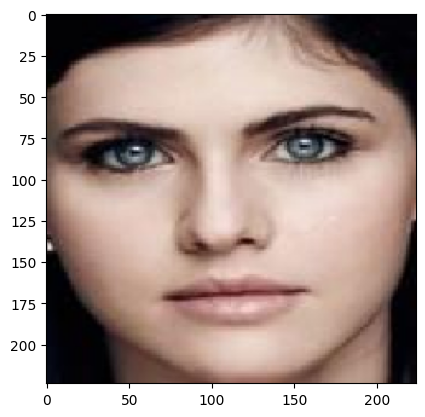

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Actual: Alexandra Daddario
Predicted: Faces


In [13]:
import os

# Select an image from the dataset to test
image_path = os.path.join(dataset_dir, "Faces", "Faces", "Alexandra Daddario_1.jpg")

# Predict the image
predict_image(image_path)